# FIRST FULL PIPELINE

Step 1: Import venue reviews file (OUTPUT: df with venue reviews)

Step 2: Sentence Tokenization (OUTPUT: list of sentences)

Step 3: Clean + Pre-Process Sentences (OUTPUT: list of cleaned sentences)

Step 4: Binary Text Classification (OUTPUT: list of filtered sentences only discussing accesisbility)

Step 5: Text Classification (OUTPUT: sentences categorized into class/aspect)

Step 6: Summarization (OUTPUT: per class, summary of sentences)

## Import packages

In [1]:
# General
import pandas as pd
import numpy as np

# Data loading
import os
import glob

# Cleaning and Pre-processing
import re

import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# Spacy
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

# TextBlob
from textblob import TextBlob

# From pre_processing.py
from pre_processing import remove_nan
from pre_processing import clean_translation

from pre_processing import remove_emoji
from pre_processing import clean_string

from pre_processing import get_lang_detector
from pre_processing import remove_non_ENG

from pre_processing import remove_stopwords
from pre_processing import lemmatize_string

#from pre_processing import sent_tok
from pre_processing import word_tok

#from pre_processing import rating_to_sent
from pre_processing import abs_date

# Load Data

In [2]:
path = "./Data/GoogleReviews"
all_files = glob.glob(path + "/*.csv")

# Count number of venues in path
file_count = 0
dir = path
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        file_count += 1

print("All_files:", len(all_files))
print("File_Count:", file_count)

# Create a list with all the data names
data_names = []

for i in range(file_count):
    data_names.append("data"+str(i))

# Create empty list
dataframes_list = []
  
# append datasets to the list
for i in range(file_count-1):
    temp_df = pd.read_csv(all_files[i])
    temp_df = temp_df.drop(columns="Unnamed: 0")
    dataframes_list.append(temp_df)
      
# display datasets
#for dataset in dataframes_list:
#    display(dataset)

All_files: 1948
File_Count: 1949


# Cleaning and Pre-processing

In [3]:
df0 = dataframes_list[0]
df1 = dataframes_list[1]
df2 = dataframes_list[2]
df3 = dataframes_list[3]
df4 = dataframes_list[4]
df5 = dataframes_list[5]

In [4]:
%%time

df_test_list = [df0, df1, df2, df3, df4, df5]

def clean_preprocess(df):
    # Drop columns we don't need and change names of columns
    df = df.drop(columns="Review Rate")
    df = df.rename(columns={"Review Time": "Date", "Review Text": "Text"})
    df["Cleaned_Sentence"] = 0

    # Drop NaN
    df = remove_nan(df, "Text")

    # Remove original language and keep translation
    df["Text"] = df["Text"].apply(clean_translation)

    # Remove emoji's
    df["Text"] = df["Text"].apply(remove_emoji)

    # Tokenize into sentences
    punctuations = '\.\!\?'
    df = (df.drop('Text',axis=1).merge(df.Text.str
                               .extractall(f'(?P<Sentence>[^{punctuations}]+[{punctuations}])\s?')
                               .reset_index('match'),left_index=True, right_index=True, how='left'))

    # Remove NaN
    df = remove_nan(df, "Sentence")

    # Remove non-English sentences
    df['Sentence'] = df['Sentence'].apply(remove_non_ENG)

    # Remove NaN
    df = remove_nan(df, "Sentence")

    # Clean Sentences
    df["Cleaned_Sentence"] = df["Sentence"].apply(clean_string)

    # Change Absolute Date to Relative Date
    df["Date"] = df["Date"].apply(abs_date)

    # Remove Stopwords
    df["Cleaned_Sentence"] = df["Cleaned_Sentence"].apply(remove_stopwords)

    # Lemmatize
    df["Cleaned_Sentence"] = df["Cleaned_Sentence"].apply(lemmatize_string)

    df["Tokens"] = df["Cleaned_Sentence"].apply(word_tok)
    
    return df

CPU times: user 15 µs, sys: 3 µs, total: 18 µs
Wall time: 21.2 µs


In [ ]:
df0 = clean_preprocess(df0)
df1 = clean_preprocess(df1)
df2 = clean_preprocess(df2)
df3 = clean_preprocess(df3)
df4 = clean_preprocess(df4)
df5 = clean_preprocess(df5)

# EDA

In [474]:
def get_distributions(df):
    print("Total number of reviews in:", df.shape[0])
    print("Class = 0:", df[df["Class"]==0].shape[0], "-->", df[df["Class"]==0].shape[0]/df.shape[0]*100,"%")
    print("Class = 1:", df[df["Class"]==1].shape[0], "-->", df[df["Class"]==1].shape[0]/df.shape[0]*100,"%")

In [475]:
get_distributions(df0)
get_distributions(df1)
get_distributions(df2)
get_distributions(df3)
get_distributions(df4)
get_distributions(df5)

Total number of reviews in: 166
Class = 0: 133 --> 80.12048192771084 %
Class = 1: 33 --> 19.879518072289155 %
Total number of reviews in: 125
Class = 0: 124 --> 99.2 %
Class = 1: 1 --> 0.8 %
Total number of reviews in: 234
Class = 0: 190 --> 81.19658119658119 %
Class = 1: 44 --> 18.803418803418804 %
Total number of reviews in: 109
Class = 0: 90 --> 82.56880733944955 %
Class = 1: 19 --> 17.431192660550458 %
Total number of reviews in: 465
Class = 0: 391 --> 84.08602150537634 %
Class = 1: 74 --> 15.913978494623656 %
Total number of reviews in: 466
Class = 0: 368 --> 78.96995708154506 %
Class = 1: 98 --> 21.030042918454935 %


In [476]:
# Shape of the dataset
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(166, 8)
(125, 8)
(234, 8)
(109, 8)
(465, 8)
(466, 8)


# Binary Classification

## Rule-Based Binary Classification (to filter reviews)

In [6]:
from binary_classifier import rule_based_classification

In [384]:
%%time
df0["Class"] = df0["Cleaned_Sentence"].apply(rule_based_classification)
df1["Class"] = df1["Cleaned_Sentence"].apply(rule_based_classification)
df2["Class"] = df2["Cleaned_Sentence"].apply(rule_based_classification)
df3["Class"] = df3["Cleaned_Sentence"].apply(rule_based_classification)
df4["Class"] = df4["Cleaned_Sentence"].apply(rule_based_classification)
df5["Class"] = df5["Cleaned_Sentence"].apply(rule_based_classification)

CPU times: user 14.4 ms, sys: 1.87 ms, total: 16.3 ms
Wall time: 17.1 ms


In [394]:
# View the dataset
# Drop extra index
#df0 = df0.drop(columns="level_0")
df1 = df1.drop(columns="level_0")
df2 = df2.drop(columns="level_0")
df3 = df3.drop(columns="level_0")
df4 = df4.drop(columns="level_0")
df5 = df5.drop(columns="level_0")

df0.head(5)

,index,Name,Date,Cleaned_Sentence,match,Sentence,Tokens,Class
0,0,Ellis,2019,bit quite went let fool ever case,0.0,"It was a bit quite when we went in, but don’t ...","[bit, quite, went, let, fool, ever, case]",0
1,0,Ellis,2019,little place cozily busy,1.0,After a little while the place was cozily busy.,"[little, place, cozily, busy]",0
2,0,Ellis,2019,rightfully,2.0,Rightfully so!,[rightfully],0
3,0,Ellis,2019,burger nacho lovely staff,3.0,"The burgers (and nachos) were lovely, as was t...","[burger, nacho, lovely, staff]",1
4,0,Ellis,2019,would definitely recommend place youre around ...,4.0,I would definitely recommend this place if you...,"[would, definitely, recommend, place, youre, a...",0


In [694]:
# Drop match column
df0 = df0.drop(columns="match")
df1 = df1.drop(columns="match")
df2 = df2.drop(columns="match")
df3 = df3.drop(columns="match")
df4 = df4.drop(columns="match")
df5 = df5.drop(columns="match")

## Machine Learning Binary Classification (to filter reviews)

In [369]:
from sklearn.model_selection import train_test_split

### Train and Test split

In [695]:
def split_data(df):
    
    # Determine X and y variables
    X = df["Cleaned_Sentence"]
    y = df["Class"]
    
    # Split dataset into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [696]:
from sklearn.model_selection import train_test_split

In [738]:
# Determine X and y variables
X0 = df0["Cleaned_Sentence"]   # Predictor
y0 = df0["Class"]              # Target

# Split dataset into train and test set
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.10, random_state=42)

X1 = df1["Cleaned_Sentence"]   # Predictor
y1 = df1["Class"]              # Target

# Split dataset into train and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.10, random_state=42)

X2 = df2["Cleaned_Sentence"]   # Predictor
y2 = df2["Class"]              # Target

# Split dataset into train and test set
X_train2, X_test2, y_train2, y_tes2t = train_test_split(X2, y2, test_size=0.10, random_state=42)

X3 = df3["Cleaned_Sentence"]   # Predictor
y3 = df3["Class"]              # Target

# Split dataset into train and test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.10, random_state=42)

X4 = df4["Cleaned_Sentence"]   # Predictor
y4 = df4["Class"]              # Target

# Split dataset into train and test set
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.10, random_state=42)

X5 = df5["Cleaned_Sentence"]   # Predictor
y5 = df5["Class"]              # Target

# Split dataset into train and test set
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.10, random_state=42)

In [402]:
# Check if y_test Class labels are correct
#y_test

#y_test_ind = [113, 164, 169, 101, 100, 15, 177, 35, 119, 152, 24, 76, 156, 118, 68, 16, 122, 30, 136]
#for i in y_test_ind:
#    print(i, df1["Sentence"].iloc[i], df1["Class"].iloc[i])

# Adjust Class labels manually
# Not necessary

## Method 1: from sklearn (Multinomial Naive Bayes, Support Vector Machinec)

### Extract Features from Text

In [740]:
from sklearn.feature_extraction.text import CountVectorizer

#df5

count_vect = CountVectorizer()
X_train_counts5 = count_vect.fit_transform(X_train5)
X_train_counts5.shape

(419, 728)

In [741]:
count_vect.vocabulary_.get(u'algorithm')

In [742]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts5)
X_train_tf5 = tf_transformer.transform(X_train_counts5)
X_train_tf5.shape

(419, 728)

In [743]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf5 = tfidf_transformer.fit_transform(X_train_counts5)
X_train_tfidf5.shape

(419, 728)

### Training Classifiers

In [744]:
# MULTINOMIAL NAIVE BAYES: df5

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_tfidf5, y_train5)

docs_new = ['The staff is friendly.', 'The toilet is not accessible.',
            'The entrance has a ramp.', 'The food is delicious.',
            'The toilet is downstairs.']
X_new_counts5 = count_vect.transform(docs_new)
X_new_tfidf5 = tfidf_transformer.transform(X_new_counts5)

predicted = clf.predict(X_new_tfidf5)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'The staff is friendly.' => 1
'The toilet is not accessible.' => 0
'The entrance has a ramp.' => 0
'The food is delicious.' => 0
'The toilet is downstairs.' => 0


### Building Pipeline

In [749]:
# MULTINOMIAL NAIVE BAYES

from sklearn.pipeline import Pipeline
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()) ])

text_clf.fit(X_train5, y_train5)

# Eval
docs_test = X_test5
predicted = text_clf.predict(docs_test)
np.mean(predicted == y_test5)

0.851063829787234

In [746]:
# SUPPOR VECTOR MACHINES 

# We can change the learner by simply plugging a different classifier object into our pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)) ])

text_clf.fit(X_train5, y_train5)

# Eval
docs_test = X_test5
predicted = text_clf.predict(docs_test)
np.mean(predicted == y_test5)

0.9787234042553191

In [750]:
# More detailed performance analysis of the results
from sklearn import metrics
print(metrics.classification_report(y_test5, predicted))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        35
           1       1.00      0.42      0.59        12

    accuracy                           0.85        47
   macro avg       0.92      0.71      0.75        47
weighted avg       0.88      0.85      0.83        47



## Method 2: from Medium (SVM and Naive Bayes)

In [751]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

### Extra pre-process

In [752]:
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df5['Tokens']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df5.loc[index,'text_final'] = str(Final_words)

In [753]:
labels=[]
for c in df5["Class"]:
    if c == 1:
        labels.append("Label 1")
    else:
        labels.append("Label 0")
df5['label'] = labels
df5.head()    

,index,Name,Date,Cleaned_Sentence,Sentence,Tokens,Class,text_final,label
0,0,Firma Pekelharing,2022,absolutely top restaurant special fantastic dish,An absolutely top restaurant with special and ...,"[absolutely, top, restaurant, special, fantast...",0,"['absolutely', 'top', 'restaurant', 'special',...",Label 0
1,0,Firma Pekelharing,2022,lovely vibe good friendly staff,Lovely vibe and very good and friendly staff.,"[lovely, vibe, good, friendly, staff]",1,"['lovely', 'vibe', 'good', 'friendly', 'staff']",Label 1
2,0,Firma Pekelharing,2022,place go amsterdam,The place to go in Amsterdam.,"[place, go, amsterdam]",0,"['place', 'go', 'amsterdam']",Label 0
3,1,Firma Pekelharing,2021,great place try everything order dish wine enjoy,"Great place to try everything, order all the d...","[great, place, try, everything, order, dish, w...",0,"['great', 'place', 'try', 'everything', 'order...",Label 0
4,2,Firma Pekelharing,2019,favourite restaurant neighborhood moment,My favourite restaurant in the neighborhood at...,"[favourite, restaurant, neighborhood, moment]",0,"['favourite', 'restaurant', 'neighborhood', 'm...",Label 0


In [758]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df5['text_final'],df5['label'],test_size=0.3)

In [755]:
Test_Y

355    Label 0
389    Label 0
451    Label 0
127    Label 0
121    Label 0
        ...   
332    Label 0
51     Label 0
90     Label 0
221    Label 0
370    Label 0
Name: label, Length: 140, dtype: object

### Encoding

In [759]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

### Word Vectorization

In [760]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df5['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [714]:
#print(Tfidf_vect.vocabulary_)

In [715]:
#print(Train_X_Tfidf)

### Naive Bayes

In [761]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  84.28571428571429


### Support Vector Machines

In [764]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  95.71428571428572


## Re-Sampling Reviews

In [731]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

from collections import Counter

### Undersampling

In [727]:
def undersample(df):
    X = df
    y = df["Class"]
    
    # define the undersampling method
    us = RandomUnderSampler(sampling_strategy='majority')

    # define undersample strategy
    us = RandomUnderSampler(sampling_strategy=0.95)

    # summarize the new class distribution
    print('Original dataset shape %s' % Counter(y))

    # fit and apply the transform
    X_under, y_under = us.fit_resample(X, y)
    print('Resampled dataset shape %s' % Counter(y_under))
    
    return X_under, y_under

In [765]:
X_under0, y_under0 = undersample(df0)
X_under1, y_under1 = undersample(df1)
X_under2, y_under2 = undersample(df2)
X_under3, y_under3 = undersample(df3)
X_under4, y_under4 = undersample(df4)
X_under5, y_under5 = undersample(df5)

Original dataset shape Counter({0: 133, 1: 33})
Resampled dataset shape Counter({0: 34, 1: 33})
Original dataset shape Counter({0: 124, 1: 1})
Resampled dataset shape Counter({0: 1, 1: 1})
Original dataset shape Counter({0: 190, 1: 44})
Resampled dataset shape Counter({0: 46, 1: 44})
Original dataset shape Counter({0: 90, 1: 19})
Resampled dataset shape Counter({0: 20, 1: 19})
Original dataset shape Counter({0: 391, 1: 74})
Resampled dataset shape Counter({0: 77, 1: 74})
Original dataset shape Counter({0: 368, 1: 98})
Resampled dataset shape Counter({0: 103, 1: 98})


### Oversampling

In [732]:
def oversample(df):
    X = df
    y = df["Class"]
    
    # define the undersampling method
    os = RandomOverSampler(sampling_strategy='majority')

    # define undersample strategy
    os = RandomOverSampler(sampling_strategy=0.95)

    # summarize the new class distribution
    print('Original dataset shape %s' % Counter(y))

    # fit and apply the transform
    X_over, y_over = os.fit_resample(X, y)
    print('Resampled dataset shape %s' % Counter(y_over))
    
    return X_over, y_over

In [733]:
X_over0, y_over0 = oversample(df0)
X_over1, y_over1 = oversample(df1)
X_over2, y_over2 = oversample(df2)
X_over3, y_over3 = oversample(df3)
X_over4, y_over4 = oversample(df4)
X_over5, y_over5 = oversample(df5)

Original dataset shape Counter({0: 133, 1: 33})
Resampled dataset shape Counter({0: 133, 1: 126})
Original dataset shape Counter({0: 124, 1: 1})
Resampled dataset shape Counter({0: 124, 1: 117})
Original dataset shape Counter({0: 190, 1: 44})
Resampled dataset shape Counter({0: 190, 1: 180})
Original dataset shape Counter({0: 90, 1: 19})
Resampled dataset shape Counter({0: 90, 1: 85})
Original dataset shape Counter({0: 391, 1: 74})
Resampled dataset shape Counter({0: 391, 1: 371})
Original dataset shape Counter({0: 368, 1: 98})
Resampled dataset shape Counter({0: 368, 1: 349})


### Data Augmentation

For text, data augmentation can be done by tokenizing document into a sentence, shuffling and rejoining them to generate new texts, or replacing adjectives, verbs etc by its a synonym to generate different text with the same meaning. Any pre-trained word embedding or NLTK’s wordnet can be used to find the synonym of a word.

In [810]:
df5.head(3)

,index,Name,Date,Cleaned_Sentence,Sentence,Tokens,Class,text_final,label
0,0,Firma Pekelharing,2022,absolutely top restaurant special fantastic dish,An absolutely top restaurant with special and ...,"[fantastic, dish, special, top, restaurant, ab...",0,"['absolutely', 'top', 'restaurant', 'special',...",Label 0
1,0,Firma Pekelharing,2022,lovely vibe good friendly staff,Lovely vibe and very good and friendly staff.,"[good, staff, friendly, vibe, lovely]",1,"['lovely', 'vibe', 'good', 'friendly', 'staff']",Label 1
2,0,Firma Pekelharing,2022,place go amsterdam,The place to go in Amsterdam.,"[place, go, amsterdam]",0,"['place', 'go', 'amsterdam']",Label 0


In [829]:
# New DF for DF incl. augmented data
df5_aug = df5[df5['Class']==1]
df5_aug = df5_aug[['Name', 'Cleaned_Sentence', 'Tokens', 'Class']]
df5_aug

,Name,Cleaned_Sentence,Tokens,Class
1,Firma Pekelharing,lovely vibe good friendly staff,"[lovely, friendly, vibe, staff, good]",1
5,Firma Pekelharing,delicious food friendly staff,"[delicious, food, friendly, staff]",1
7,Firma Pekelharing,friendly sightly cheeky staff,"[sightly, cheeky, staff, friendly]",1
8,Firma Pekelharing,restaurant nice atmosphere good service,"[good, service, nice, atmosphere, restaurant]",1
9,Firma Pekelharing,waiter always available explained whole menu,"[explained, menu, available, waiter, always, w...",1
...,...,...,...,...
443,Firma Pekelharing,pleasant service,"[pleasant, service]",1
444,Firma Pekelharing,great food super nice service,"[great, food, service, nice, super]",1
446,Firma Pekelharing,great food good service,"[good, food, great, service]",1
449,Firma Pekelharing,good food nice service,"[service, good, nice, food]",1


In [830]:
def data_aug(data):
    data_aug_list=[]
    for token_list in data['Tokens']:
        random.shuffle(token_list)
        new_row = ' '.join(token_list)
        data_aug_list.append(new_row)

    return data_aug_list

In [831]:
data_aug_list = data_aug(df5_aug)

In [834]:
new_df = pd.DataFrame(columns=["Name", "Cleaned_Sentence", "Tokens", "Class"])
new_df["Name"] = df5_aug["Name"]
new_df["Cleaned_Sentence"] = data_aug_list
new_df["Tokens"] = new_df["Cleaned_Sentence"].apply(word_tok)
new_df["Class"] = 1
df5_aug = pd.concat([df5_aug, new_df], ignore_index=True)
df5_aug

,Name,Cleaned_Sentence,Tokens,Class
0,Firma Pekelharing,lovely vibe good friendly staff,"[staff, good, vibe, friendly, lovely]",1
1,Firma Pekelharing,delicious food friendly staff,"[food, friendly, delicious, staff]",1
2,Firma Pekelharing,friendly sightly cheeky staff,"[cheeky, sightly, staff, friendly]",1
3,Firma Pekelharing,restaurant nice atmosphere good service,"[atmosphere, nice, restaurant, good, service]",1
4,Firma Pekelharing,waiter always available explained whole menu,"[menu, available, waiter, always, whole, expla...",1
...,...,...,...,...
191,Firma Pekelharing,pleasant service,"[pleasant, service]",1
192,Firma Pekelharing,service food great nice super,"[service, food, great, nice, super]",1
193,Firma Pekelharing,good food great service,"[good, food, great, service]",1
194,Firma Pekelharing,nice food good service,"[nice, food, good, service]",1


In [835]:
# Re-join with df5
df5_class_0 = df5[df5["Class"]==0]
df5_class_0 = df5_class_0[['Name', 'Cleaned_Sentence', 'Tokens', 'Class']]
df5_aug = pd.concat([df5_aug, df5_class_0], ignore_index=True)
df5_aug

,Name,Cleaned_Sentence,Tokens,Class
0,Firma Pekelharing,lovely vibe good friendly staff,"[staff, good, vibe, friendly, lovely]",1
1,Firma Pekelharing,delicious food friendly staff,"[food, friendly, delicious, staff]",1
2,Firma Pekelharing,friendly sightly cheeky staff,"[cheeky, sightly, staff, friendly]",1
3,Firma Pekelharing,restaurant nice atmosphere good service,"[atmosphere, nice, restaurant, good, service]",1
4,Firma Pekelharing,waiter always available explained whole menu,"[menu, available, waiter, always, whole, expla...",1
...,...,...,...,...
559,Firma Pekelharing,fresh product well cooked nothing say,"[fresh, product, well, cooked, nothing, say]",0
560,Firma Pekelharing,delicious eaten,"[delicious, eaten]",0
561,Firma Pekelharing,nice drink regain strength,"[nice, drink, regain, strength]",0
562,Firma Pekelharing,okay special,"[okay, special]",0


## (AFTER RESAMPLING) Machine Learning Binary Classification (to filter reviews)



### Method 1 & Undersample

In [766]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_under0["Cleaned_Sentence"], y_under0, test_size=0.10, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_under1["Cleaned_Sentence"], y_under1, test_size=0.10, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_under2["Cleaned_Sentence"], y_under2, test_size=0.10, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_under3["Cleaned_Sentence"], y_under3, test_size=0.10, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_under4["Cleaned_Sentence"], y_under4, test_size=0.10, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_under5["Cleaned_Sentence"], y_under5, test_size=0.10, random_state=42)

In [767]:
count_vect = CountVectorizer()
X_train_counts5 = count_vect.fit_transform(X_train5)
print(X_train_counts5.shape)

count_vect.vocabulary_.get(u'algorithm')

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts5)
X_train_tf5 = tf_transformer.transform(X_train_counts5)
print(X_train_tf5.shape)

tfidf_transformer = TfidfTransformer()
X_train_tfidf5 = tfidf_transformer.fit_transform(X_train_counts5)
print(X_train_tfidf5.shape)

(180, 401)
(180, 401)
(180, 401)


In [768]:
# MULTINOMIAL NAIVE BAYES

from sklearn.pipeline import Pipeline

text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()) ])

text_clf.fit(X_train5, y_train5)

# Evaluation
docs_test = X_test5
predicted = text_clf.predict(docs_test)
np.mean(predicted == y_test5)
# 0.7619047619047619

0.7619047619047619

In [769]:
# SUPPOR VECTOR MACHINES 

# We can change the learner by simply plugging a different classifier object into our pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)) ])

text_clf.fit(X_train5, y_train5)

# Evaluation
predicted = text_clf.predict(X_test5)
np.mean(predicted == y_test5)

# 0.9047619047619048

0.9047619047619048

### Method 1 & Oversample

In [838]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_over0["Cleaned_Sentence"], y_over0, test_size=0.10, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_over1["Cleaned_Sentence"], y_over1, test_size=0.10, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_over2["Cleaned_Sentence"], y_over2, test_size=0.10, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_over3["Cleaned_Sentence"], y_over3, test_size=0.10, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_over4["Cleaned_Sentence"], y_over4, test_size=0.10, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_over5["Cleaned_Sentence"], y_over5, test_size=0.10, random_state=42)

In [848]:
y_train0

132    0
227    1
237    1
143    0
19     0
      ..
20     0
188    1
71     0
106    1
102    0
Name: Class, Length: 233, dtype: int64

In [839]:
# MULTINOMIAL NAIVE BAYES

from sklearn.pipeline import Pipeline

text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()) ])

text_clf.fit(X_train5, y_train5)

# Evaluation
docs_test = X_test5
predicted = text_clf.predict(docs_test)
np.mean(predicted == y_test5)
# 0.9305555555555556

0.9305555555555556

In [772]:
# SUPPOR VECTOR MACHINES 

# We can change the learner by simply plugging a different classifier object into our pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)) ])

text_clf.fit(X_train5, y_train5)

# Evaluation
predicted = text_clf.predict(X_test5)
np.mean(predicted == y_test5)

# 1.0

1.0

### Method 1 & Data Augmentation

In [849]:
X = df5_aug["Cleaned_Sentence"]
y = df5_aug["Class"]
y = y.astype('int')

X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.10, random_state=42)


In [850]:
# MULTINOMIAL NAIVE BAYES

from sklearn.pipeline import Pipeline

text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()) ])

text_clf.fit(X_train5, y_train5)

# Evaluation
docs_test = X_test5
predicted = text_clf.predict(docs_test)
np.mean(predicted == y_test5)
# 0.9473684210526315

0.9473684210526315

In [851]:
# SUPPOR VECTOR MACHINES 

# We can change the learner by simply plugging a different classifier object into our pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)) ])

text_clf.fit(X_train5, y_train5)

# Evaluation
predicted = text_clf.predict(X_test5)
np.mean(predicted == y_test5)

# 0.9824561403508771

0.9824561403508771

### Method 2

In [853]:
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

#X_over5, y_over5

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X_over5,y_over5,test_size=0.3)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(y_train5)
Test_Y = Encoder.fit_transform(y_test5)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(X_over5['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(X_train5)
Test_X_Tfidf = Tfidf_vect.transform(X_test5)

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

Naive Bayes Accuracy Score ->  94.73684210526315
SVM Accuracy Score ->  98.24561403508771


## Filter Dataset

In [854]:
# Filter df on Sentences discussing Accessibility
df5_filtered = df5[df5["Class"]==1]
df5_filtered

,index,Name,Date,Cleaned_Sentence,Sentence,Tokens,Class,text_final,label
1,0,Firma Pekelharing,2022,lovely vibe good friendly staff,Lovely vibe and very good and friendly staff.,"[staff, good, vibe, friendly, lovely]",1,"['lovely', 'vibe', 'good', 'friendly', 'staff']",Label 1
5,2,Firma Pekelharing,2019,delicious food friendly staff,Delicious food and friendly staff.,"[food, friendly, delicious, staff]",1,"['delicious', 'food', 'friendly', 'staff']",Label 1
7,3,Firma Pekelharing,2018,friendly sightly cheeky staff,Very friendly - and sightly cheeky - staff.,"[cheeky, sightly, staff, friendly]",1,"['friendly', 'sightly', 'cheeky', 'staff']",Label 1
8,4,Firma Pekelharing,2020,restaurant nice atmosphere good service,The restaurant had a nice atmosphere and very ...,"[atmosphere, nice, restaurant, good, service]",1,"['restaurant', 'nice', 'atmosphere', 'good', '...",Label 1
9,4,Firma Pekelharing,2020,waiter always available explained whole menu,The waiters were always available and explaine...,"[menu, available, waiter, always, whole, expla...",1,"['waiter', 'always', 'available', 'explained',...",Label 1
...,...,...,...,...,...,...,...,...,...
443,241,Firma Pekelharing,2019,pleasant service,Pleasant service.,"[pleasant, service]",1,"['pleasant', 'service']",Label 1
444,243,Firma Pekelharing,2019,great food super nice service,Great food and super nice service.,"[service, food, great, nice, super]",1,"['great', 'food', 'super', 'nice', 'service']",Label 1
446,248,Firma Pekelharing,2018,great food good service,"Great food, good service.","[good, food, great, service]",1,"['great', 'food', 'good', 'service']",Label 1
449,252,Firma Pekelharing,2019,good food nice service,Good food and very nice service.,"[nice, food, good, service]",1,"['good', 'food', 'nice', 'service']",Label 1


In [692]:
df5_filtered.iloc[0][3]

'lovely vibe good friendly staff'

# Topic Classification

## Rule-Based Topic Classification

In [866]:
from topic_classification import topic_classification
#from topic_classification import topic_bool

def topic_classification(text):

    general = ["wheelchair", "disability", "disabled", "handicap", "handicapped", "mobility"]
    entrance = ["entrance", "door", "ramp", "narrow"]
    bathroom = ["toilet", "bathroom", "restroom"]
    transport = ["parking"]
    stairs = ["elevator", "steps", "stair", "steep", "narrow"]
    space = ["cramped", "spacious"]
    staff = ["service", "staff", "waiter", "waitress"]

    category = str()

    if any(word in text for word in general):
        category = category + "general"
    elif any(word in text for word in entrance):
        category = category + "entrance"
    elif any(word in text for word in bathroom):
        category = category + "bathroom"
    elif any(word in text for word in transport):
        category = category + "transport"
    elif any(word in text for word in stairs):
        category = category + "stairs"
    elif any(word in text for word in space):
        category = category + "space"
    elif any(word in text for word in staff):
        category = category + "staff"

    return category

def topic_bool(text):
    
    if text == "general":
        category_id = 1
    elif text == "entrance":
        category_id = 2
    elif text == "bathroom":
        category_id = 3
    elif text == "transport":
        category_id = 4
    elif text == "stairs":
        category_id = 5
    elif text == "space":
        category_id = 6
    elif text == "staff":
        category_id = 7
    
    return category_id

In [864]:
%%time
df5_filtered["Category"] = df5_filtered["Cleaned_Sentence"].apply(topic_classification)

CPU times: user 4.38 ms, sys: 21.7 ms, total: 26.1 ms
Wall time: 35.9 ms


In [867]:
%%time
df5_filtered["Category_ID"] = df5_filtered["Category"].apply(topic_bool)

CPU times: user 2.89 ms, sys: 8.37 ms, total: 11.3 ms
Wall time: 14.9 ms


In [868]:
df5_filtered.head()

,Name,Cleaned_Sentence,Tokens,Class,Category,Category_ID
1,Firma Pekelharing,lovely vibe good friendly staff,"[staff, good, vibe, friendly, lovely]",1,staff,7
5,Firma Pekelharing,delicious food friendly staff,"[food, friendly, delicious, staff]",1,staff,7
7,Firma Pekelharing,friendly sightly cheeky staff,"[cheeky, sightly, staff, friendly]",1,staff,7
8,Firma Pekelharing,restaurant nice atmosphere good service,"[atmosphere, nice, restaurant, good, service]",1,staff,7
9,Firma Pekelharing,waiter always available explained whole menu,"[menu, available, waiter, always, whole, expla...",1,staff,7


In [873]:
df5_filtered.shape

(98, 6)

## Topic Distribution

In [879]:
#print(df5_filtered[df5_filtered["Category_ID"]==1].count()) ==> 0
print(df5_filtered[df5_filtered["Category_ID"]==2].count())# ==> 1
print(df5_filtered[df5_filtered["Category_ID"]==3].count())# ==> 1
#print(df5_filtered[df5_filtered["Category_ID"]==4].count()) ==> 0
#print(df5_filtered[df5_filtered["Category_ID"]==5].count()) ==> 0
print(df5_filtered[df5_filtered["Category_ID"]==6].count())# ==> 1
print(df5_filtered[df5_filtered["Category_ID"]==7].count())# ==> 95

Name                1
Cleaned_Sentence    1
Tokens              1
Class               1
Category            1
Category_ID         1
dtype: int64
Name                1
Cleaned_Sentence    1
Tokens              1
Class               1
Category            1
Category_ID         1
dtype: int64
Name                1
Cleaned_Sentence    1
Tokens              1
Class               1
Category            1
Category_ID         1
dtype: int64
Name                95
Cleaned_Sentence    95
Tokens              95
Class               95
Category            95
Category_ID         95
dtype: int64


## Re-Sample Categories

## Method 1: Machine Learning Topic Classification

https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

In [857]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Pre-Process / EDA

In [861]:
df5_filtered = df5_filtered[["Name", "Cleaned_Sentence", "Tokens", "Class", "Category"]]
df5_filtered.shape

(98, 5)

In [862]:
df5_filtered.head()

,Name,Cleaned_Sentence,Tokens,Class,Category
1,Firma Pekelharing,lovely vibe good friendly staff,"[staff, good, vibe, friendly, lovely]",1,staff
5,Firma Pekelharing,delicious food friendly staff,"[food, friendly, delicious, staff]",1,staff
7,Firma Pekelharing,friendly sightly cheeky staff,"[cheeky, sightly, staff, friendly]",1,staff
8,Firma Pekelharing,restaurant nice atmosphere good service,"[atmosphere, nice, restaurant, good, service]",1,staff
9,Firma Pekelharing,waiter always available explained whole menu,"[menu, available, waiter, always, whole, expla...",1,staff


In [863]:
df5_filtered[df5_filtered["Category"]=="bathroom"]

,Name,Cleaned_Sentence,Tokens,Class,Category
240,Firma Pekelharing,unfortunately one waitress quite rude toilet c...,"[hence, one, waitress, star, 3, rude, quite, t...",1,bathroom


In [632]:
# Create a new column 'category_id' with encoded categories 
df5_filtered['category_id'] = df5_filtered['Category'].factorize()[0]
category_id_df = df5_filtered[['Category', 'category_id']].drop_duplicates()

/var/folders/rn/k7vf4gp97fb11dzjbcr7w8bc0000gn/T/ipykernel_9062/1932043138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_filtered['category_id'] = df5_filtered['Category'].factorize()[0]


In [634]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
# New dataframe
df5_filtered.head()

,index,Name,Date,Cleaned_Sentence,match,Sentence,Tokens,Class,text_final,label,Category,category_id
1,0,Firma Pekelharing,2022,lovely vibe good friendly staff,1.0,Lovely vibe and very good and friendly staff.,"[lovely, vibe, good, friendly, staff]",1,"['lovely', 'vibe', 'good', 'friendly', 'staff']",Label 1,staff,0
5,2,Firma Pekelharing,2019,delicious food friendly staff,1.0,Delicious food and friendly staff.,"[delicious, food, friendly, staff]",1,"['delicious', 'food', 'friendly', 'staff']",Label 1,staff,0
7,3,Firma Pekelharing,2018,friendly sightly cheeky staff,1.0,Very friendly - and sightly cheeky - staff.,"[friendly, sightly, cheeky, staff]",1,"['friendly', 'sightly', 'cheeky', 'staff']",Label 1,staff,0
8,4,Firma Pekelharing,2020,restaurant nice atmosphere good service,0.0,The restaurant had a nice atmosphere and very ...,"[restaurant, nice, atmosphere, good, service]",1,"['restaurant', 'nice', 'atmosphere', 'good', '...",Label 1,staff,0
9,4,Firma Pekelharing,2020,waiter always available explained whole menu,1.0,The waiters were always available and explaine...,"[waiter, always, available, explained, whole, ...",1,"['waiter', 'always', 'available', 'explained',...",Label 1,staff,0


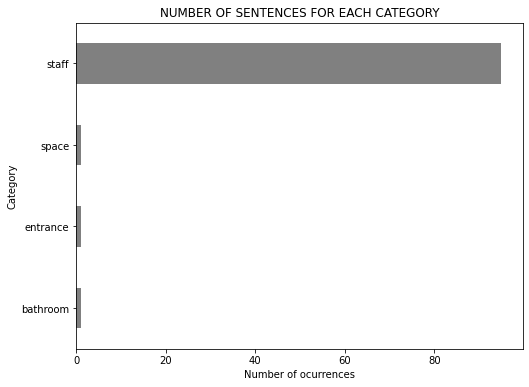

In [635]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df5_filtered.groupby('Category').Sentence.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF SENTENCES FOR EACH CATEGORY')
plt.xlabel('Number of ocurrences', fontsize = 10);

### Text Processing

In [643]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df5_filtered.Sentence).toarray()
labels = df5_filtered.category_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 98 complaints is represented by 28 features (TF-IDF score of unigrams and bigrams)


In [644]:
# Finding the three most correlated terms with each of the product categories
N = 5
for Sentence, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("n==> %s:" %(Sentence))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

n==> bathroom:
  * Most Correlated Unigrams are: friendly, nice, good, food, service
  * Most Correlated Bigrams are: great food, friendly staff, good food, friendly service, good service
n==> entrance:
  * Most Correlated Unigrams are: friendly, nice, good, food, service
  * Most Correlated Bigrams are: great food, friendly staff, good food, friendly service, good service
n==> space:
  * Most Correlated Unigrams are: nice, friendly, good, wine, restaurant
  * Most Correlated Bigrams are: great food, friendly staff, good service, friendly service, good food
n==> staff:
  * Most Correlated Unigrams are: great, staff, service, wine, restaurant
  * Most Correlated Bigrams are: great food, friendly staff, good service, friendly service, good food


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get

### Multi-Class models

In [645]:
X = df5_filtered['Sentence'] # Collection of documents
y = df5_filtered['Category'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)


In [646]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [647]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [649]:
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


### Compare Text Classification Model Performance

In [650]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.97,0.027386
LogisticRegression,0.97,0.027386
MultinomialNB,0.97,0.027386
RandomForestClassifier,0.97,0.027386


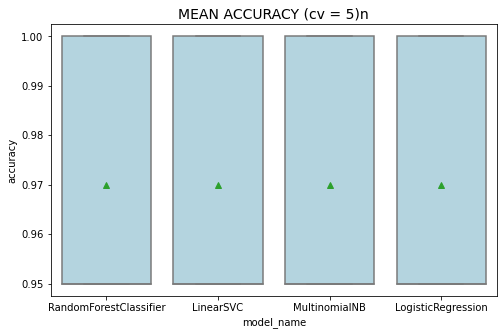

In [651]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

### Evaluation of Text Classification Model

In [653]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df5_filtered.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [655]:
# Classification report
print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df5_filtered['Category'].unique()))

ttttCLASSIFICATIION METRICSn


ValueError: Number of classes, 2, does not match size of target_names, 4. Try specifying the labels parameter

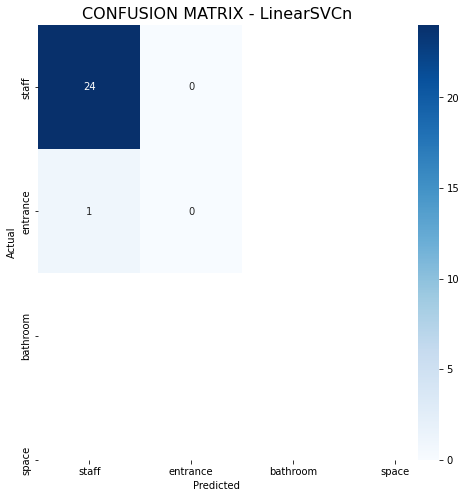

In [657]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Category.values, 
            yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

In [659]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [660]:
complaint = """The toilet was upstairs."""
print(model.predict(fitted_vectorizer.transform([complaint])))

['staff']


In [662]:
complaint = """The entrance was upstairs."""
print(model.predict(fitted_vectorizer.transform([complaint])))

['staff']


## Method 2: Machine Learning Topic Classification

# Sentiment Analysis

In [881]:
df5_filtered.head()

,Name,Cleaned_Sentence,Tokens,Class,Category,Category_ID
1,Firma Pekelharing,lovely vibe good friendly staff,"[staff, good, vibe, friendly, lovely]",1,staff,7
5,Firma Pekelharing,delicious food friendly staff,"[food, friendly, delicious, staff]",1,staff,7
7,Firma Pekelharing,friendly sightly cheeky staff,"[cheeky, sightly, staff, friendly]",1,staff,7
8,Firma Pekelharing,restaurant nice atmosphere good service,"[atmosphere, nice, restaurant, good, service]",1,staff,7
9,Firma Pekelharing,waiter always available explained whole menu,"[menu, available, waiter, always, whole, expla...",1,staff,7


# Topic Summarization

In [28]:
from summarization import ex_summarization
from summarization import conc_sentences

In [225]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

def conc_sentences(df):
    
    df_general = df[df["Category"]=="general"]
    df_entrance = df[df["Category"]==["entrance"]]
    df_bathroom = df[df["Category"]==["bathroom"]]
    df_transport = df[df["Category"]==["transport"]]
    df_stairs = df[df["Category"]==["stairs"]]
    df_space = df[df["Category"]==["space"]]
    df_staff = df[df["Category"]==["staff"]]
    
    return df_general, df_entrance, df_bathroom, df_transport, df_stairs, df_space, df_staff

def ex_summarization(text):
    '''Concatenate reviews into one document.
    Summarize document based on length of document'''
    
    # Concatenate seperate sentences into one document
    doc = str()
    sentence_count = 0
    
    for sentence in text:
        sentence_count += 1
        sentence = str(sentence)
        sentence = sentence.capitalize()
        doc = doc + ' ' + sentence
    
    #print("Sentence count:", sentence_count)
    #print("Original Document:", doc)
    
    if sentence_count > 2:
        venue_summary = summarize(doc, ratio=0.5)
    else:
        venue_summary = doc
    
    #print("Summary:", venue_summary)
    
    return venue_summary

In [104]:
df_general, df_entrance, df_bathroom, df_transport, df_stairs, df_space, df_staff = conc_sentences(df1_filtered)

In [226]:
df_categories = [df_general, df_entrance, df_bathroom, df_transport, df_stairs, df_space, df_staff]
df_summary = pd.DataFrame(columns=["Name", "Category", "Summary"])
temp_df = pd.DataFrame(columns=["Name", "Category", "Summary"])

for df in df_categories:
    if df.empty == False:
        temp_df.loc[0, "Name"] = df["Name"].iloc[0]
        temp_df.loc[0, "Category"] = df["Category"].iloc[0]
        sentence_list = list(df["Sentence"])        
        temp_df.loc[0, "Summary"] = ex_summarization(sentence_list)
        df_summary = df_summary.append(temp_df, ignore_index = True)

df_summary

/var/folders/rn/k7vf4gp97fb11dzjbcr7w8bc0000gn/T/ipykernel_9062/3360370633.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_summary = df_summary.append(temp_df, ignore_index = True)


,Name,Category,Summary
0,Stroom,entrance,"Great food, good coffee, amazing outdoor seat..."
1,Stroom,bathroom,Even tho we were sitting next to the bathroom...
2,Stroom,stairs,"If you sit upstairs, you will have a view ove..."
3,Stroom,staff,Friendly and nice staff and good coffee.\nLaid...


In [228]:
df_summary.iloc[3][2]

'Friendly and nice staff and good coffee.\nLaid-back  atmosphere and very nice staff.\nthe staff is so nice and kind.\nDelicious food, however the service is always very slow.\nGood breakfast/brunch place, excellent service and very welcoming to children!\nVery good food - extremely friendly staff - i can recommend this place!\nSlow service due to crowds, excellent food.\nGreat friendly staff!\nRelaxed and peaceful with attentive and friendly staff.\nTasty breakfasts and friendly staff.\nPleasant atmosphere and friendly staff.\ntasty sandwiches and good service.'

In [606]:
df_summary.iloc[2][2]

' If you sit upstairs, you will have a view over the street and the people sitting outside.'

In [232]:
import spacy
import pytextrank

# example text
text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)

doc = nlp(text)

# examine the top-ranked phrases in the document
for p in doc._.phrases:
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))
    print(p.chunks)

AttributeError: module 'pytextrank' has no attribute 'TextRank'